In [19]:
import importlib
import copy

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

# Classification of Ski Area Rankings

<img src="https://static.evo.com/content/travel-guides/id/schweitzer/691398.jpeg" width="800"/>

### Authors: Gabriel Hoing and Sean Cowan

### Class: CPSC 322, Fall 2024

## 1. Introduction

As both of us are avid skiers, we opted to classy a dataset that had ski area 
information.     

Of the available attributes, we opted to classify ski area's based on rating 
because this seemed to be the best attribute to signify how "good" a ski area 
is.  

Our classification was fairly successful with accuracies reaching about 60% 
for Naive Bayes, Random Forest, and Decision Tree classifiers.  

The Naive Bayes classifier edged out the others in accuracy by slight margins.

## 2. Data Analysis

We got the dataset from Kaggle, https://www.kaggle.com/datasets/fhellander/global-ski-resort-rankings-dataset

The dataset we used has 3285 ski areas with the following attributes.   
* rank - integer value that marks the ski area's rank based on rating score
* name - string value that is the name of the ski area
* rating - numerical value that quantifies the quality of the ski area
* url - object that is the url of the ski area's website
* location_coordinate - coordinates of the ski area's location
* location_country - string value that is the country the ski area is located in
* location_region - string value that is the region of the country the ski area is located in 
* elevation_top_m - numerical value that is the height in meters of the high point of the ski area
* elevation_top_difference_m - numerical value that is the difference between highest and lowest point in meters
* total_slope_length_km - numerical value that is the total length of all runs
* number_of_lifts - integer value that is number of lifts
* number_of_slopes - integer value that is the number of runs
* annual_snowfall_cm - numerical value that is the average annual snowfall
* number_of_matches - integer value that has an unknown meaning

We discretized rating into 5 evenly distributed categories...   
"very low", "low", "average", "high", "very high"   
... by calculating each category's percentiles. 

e.g. if x is in "average", then (40th percentile) < x < (60th percentile)

For attributes, we chose to classify on the following...
* elevation_top_m
* elevation_top_difference_m
* total_slope_length_km
* number_of_lifts
* number_of_slopes
* annual_snowfall_cm

These attributes all intuitively would have some relationship with 
ski restort rating.     
To examine their relationship further, we can examine their correlations with rating.

In [ ]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "elevation_difference_m", "total_slope_length_km", "number_of_lifts", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "very high", "high", "average", "low", "very low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

X_copy = copy.deepcopy(ski_X)
y_copy = copy.deepcopy(ski_y)
for i, row in enumerate(X_copy):
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_elevation_difference(row[1])
    row[2] = myutils.discretize_slope_length(row[2])
    row[3] = myutils.discretize_num_lifts(row[3])
    row[4] = myutils.discretize_num_slopes(row[4])
    row[5] = myutils.discretize_snowfall(row[5])
    y_copy[i] = discretizer(y_copy[i])

# correlation coefficients
# elevation_top_m
elev_top = ski_dataset.get_column("elevation_top_m")
etm_corr = myutils.calculate_correlation(ski_y, elev_top)
print("elevation_top_m correlation:", etm_corr)

# elevation_difference_m
elev_diff = ski_dataset.get_column("elevation_difference_m")
edm_corr = myutils.calculate_correlation(ski_y, elev_diff)
print("elevation_difference_m correlation:", edm_corr)

# total_slope_length_km
slope = ski_dataset.get_column("total_slope_length_km")
tslk_corr = myutils.calculate_correlation(ski_y, slope)
print("total_slope_length_km correlation:", tslk_corr)

# number_of_lifts
number_of_lifts = ski_dataset.get_column("number_of_lifts")
number_of_lifts_corr = myutils.calculate_correlation(ski_y, number_of_lifts)
print("number_of_lifts correlation:", number_of_lifts_corr)

# number_of_slopes
number_of_slopes = ski_dataset.get_column("number_of_slopes")
number_of_slopes_corr = myutils.calculate_correlation(ski_y, number_of_slopes)
print("number_of_slopes correlation:", number_of_slopes_corr)

# annual_snowfall_cm
annual_snowfall_cm = ski_dataset.get_column("annual_snowfall_cm")
annual_snowfall_cm_corr = myutils.calculate_correlation(ski_y, annual_snowfall_cm)
print("annual_snowfall_cm correlation:", annual_snowfall_cm_corr)

elevation_top_m correlation: 0.6861473998724411
elevation_difference_m correlation: 0.8769754461110189
total_slope_length_km correlation: 0.736100252878459
number_of_lifts correlation: 0.6881072556036895
number_of_slopes correlation: 0.6357378057195263
annual_snowfall_cm correlation: 0.6718742053727572


Based on the above correlation, the attributes that are the most 
correlated with ski area rating are elevation_difference_m and 
total_slope_length_cm.  
With this in mind, it does seem that every attribute has a fairly large 
correlation coefficient with rating.

### Summary statistics and Visualizations

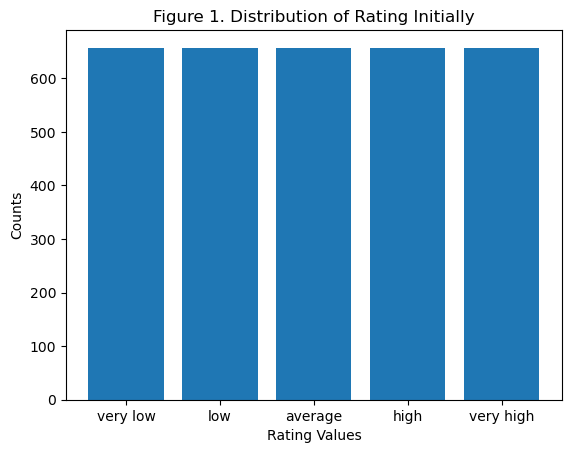

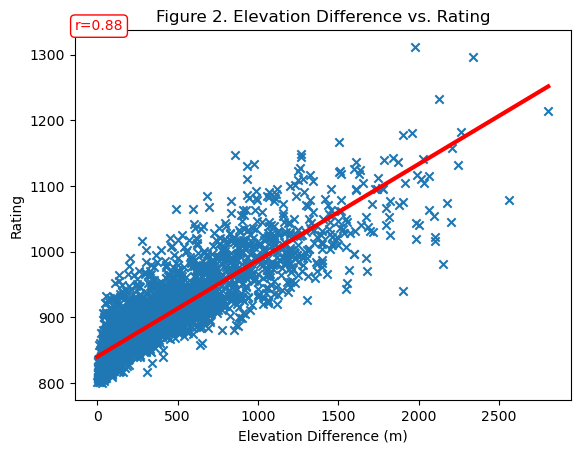

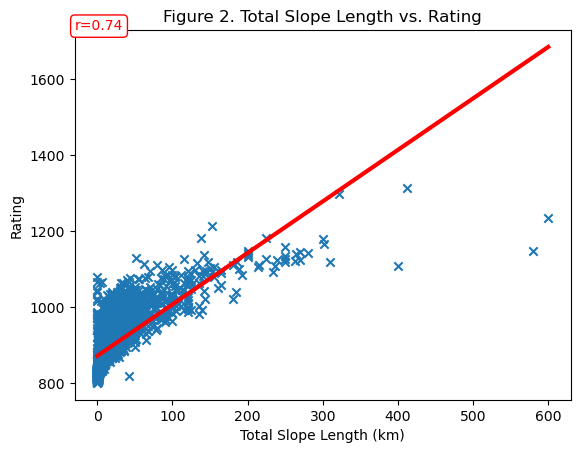

In [21]:
# true distribution of rating after discretization
display_order = [4, 2, 0, 1, 3]

values, counts = myutils.get_frequencies(y_copy)
ordered_values = [values[i] for i in display_order]
ordered_counts = [counts[i] for i in display_order]

plt.bar_chart(ordered_values, ordered_counts, "Figure 1. Distribution of Rating Initially", \
              "Rating Values", "Counts")

# scatter plot of rating vs elevation_difference_m
m, b = myutils.compute_slope_intercept(elev_diff, ski_y)
plt.linear_regression(elev_diff, ski_y, m, b, "Figure 2. Elevation Difference vs. Rating", \
                     "Elevation Difference (m)", "Rating")

# scatter plot of rating vs total_slope_length_km
m, b = myutils.compute_slope_intercept(slope, ski_y)
plt.linear_regression(slope, ski_y, m, b, "Figure 2. Total Slope Length vs. Rating", \
                     "Total Slope Length (km)", "Rating")

#### Figure 1.
Figure 1 shows how rating values are discretized into evenly distributed "bins"
so classification is possible.

#### Figure 2.
Figure 2 is a scatter plot with a fitted linear regression line. Elevation Difference was 
the most correlated attribute with rating and the linear regression line seems to fit well. 

#### Figure 3.
Figure 3 is a scatter plot with a fitten linear regression line. The relationship between 
total slope length and rating seems more logarithmic than linear which might be something 
to explore in the future.

In [ ]:
# important summary statistics 

# Dummy Classification

In [11]:
dummy_clf = MyDummyClassifier()
dummy_actual, dummy_pred, dummy_accuracy, dummy_error = myevaluation.display_cross_val(X_copy, y_copy, dummy_clf, matrix_headers)

Accuracy: 0.19792935444579782, Error Rate: 0.8020706455542022

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high            0     198        264    195           0      657                  0
high                 0     195        264    198           0      657                 29
average              0     198        260    198           0      656                 39
low                  0     198        264    195           0      657                 29
very low             0     195        264    198           0      657                  0


## kNN Classification

In [ ]:
knn_clf = MyKNeighborsClassifier(categorical=True)
knn_actual, knn_pred, knn_actual, knn_error = myevaluation.display_cross_val(X_copy, y_copy, knn_clf, matrix_headers)

Accuracy: 0.4284409257003654, Error Rate: 0.5715590742996346

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          585      65          7      0           0      657                 89
high               271     267        101     15           3      657                 40
average             77     246        255     68          10      656                 38
low                  4     110        288    224          31      657                 34
very low             1      44        113    423          76      657                 11


# Naive Bayes Classification

In [ ]:
nb_clf = MyNaiveBayesClassifier()
nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.display_cross_val(X_copy, y_copy, nb_clf, matrix_headers)

Accuracy: 0.6017052375152253, Error Rate: 0.3982947624847747

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          535     102         16      0           4      657                 81
high               146     314        147     32          18      657                 47
average             14     181        288    156          17      656                 43
low                  2       9        155    318         173      657                 48
very low             2       0         10    124         521      657                 79


# Decision Tree Classification

In [ ]:
tree_clf = MyDecisionTreeClassifier()
tree_actual, tree_pred, tree_accuracy, tree_error = myevaluation.display_cross_val(X_copy, y_copy, tree_clf, matrix_headers)

Accuracy: 0.5959196102314251, Error Rate: 0.40408038976857485

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          538     103         13      3           0      657                 81
high               114     340        140     50          13      657                 51
average             12     170        231    206          37      656                 35
low                  3      18         93    371         172      657                 56
very low             1       0          3    176         477      657                 72


# Random Forest Classification

In [ ]:
forest_clf = MyRandomForestClassifier(50, 3, 4)
forest_actual, forest_pred, forest_accuracy, forest_error = myevaluation.display_cross_val(X_copy, y_copy, forest_clf, matrix_headers)

Accuracy: 0.5931790499390986, Error Rate: 0.40682095006090135

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          517     119         19      2           0      657                 78
high                99     347        147     51          13      657                 52
average              9     154        266    192          35      656                 40
low                  0      18        131    320         188      657                 48
very low             0       2          7    150         498      657                 75


## Data Visualizations

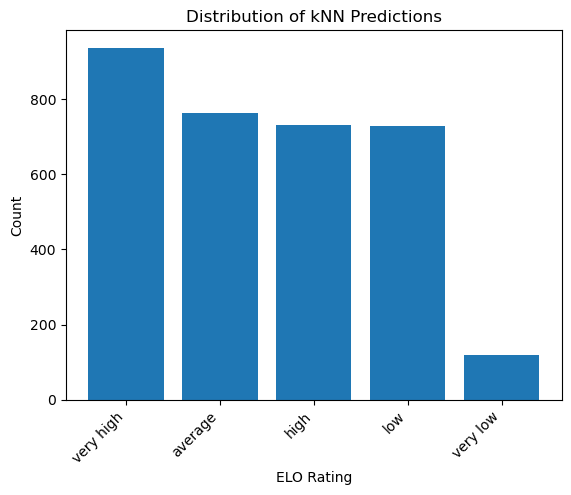

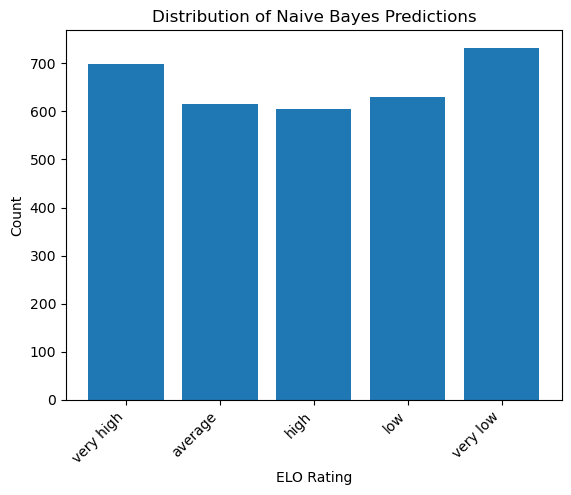

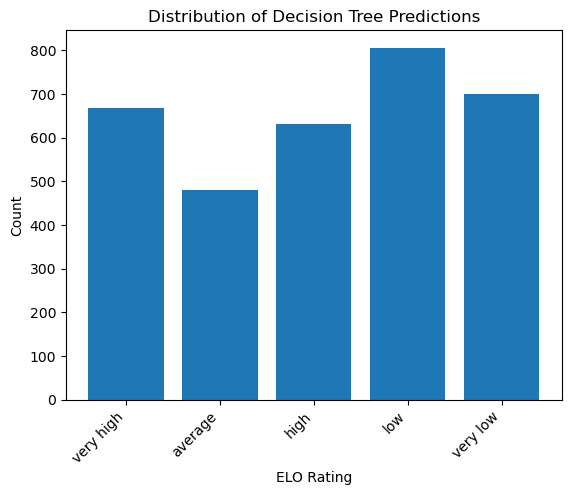

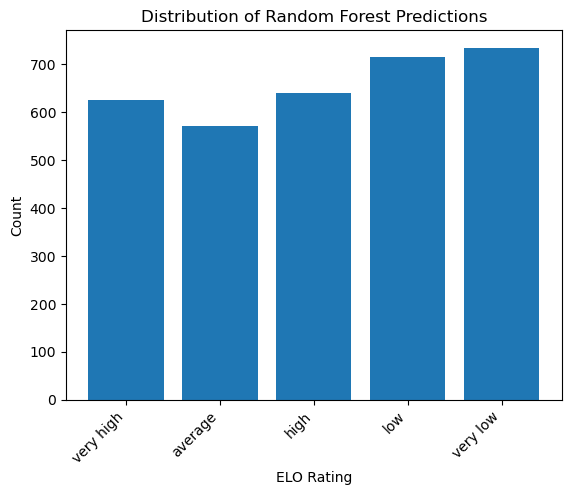

In [ ]:
myevaluation.display_distributions(knn_pred, "kNN")
myevaluation.display_distributions(nb_pred, "Naive Bayes")
myevaluation.display_distributions(tree_pred, "Decision Tree")
myevaluation.display_distributions(forest_pred, "Random Forest")